In [1]:
# 📦 Importing necessary libraries
import pandas as pd                         # For data manipulation and analysis
import numpy as np                          # For numerical computations
import seaborn as sns                       # For statistical visualizations
import matplotlib.pyplot as plt             # For plotting charts and graphs
from sklearn.ensemble import IsolationForest  # For anomaly detection
from sklearn.preprocessing import StandardScaler  # For feature scaling (optional)
from sklearn.model_selection import train_test_split  # For splitting dataset
from sklearn.linear_model import LogisticRegression   # For classification
from sklearn.metrics import classification_report     # For model evaluation

In [2]:
# 📥 Load the dataset
df = pd.read_csv("IRIS.csv")

# 🖨️ Display basic info
print("📄 Dataset Shape:", df.shape)         # Show rows and columns
print("🔍 First 5 Records:")
display(df.head())                           # Show top 5 rows

📄 Dataset Shape: (150, 5)
🔍 First 5 Records:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check for missing values
print("❓ Missing values:\n", df.isnull().sum())
df.drop_duplicates(inplace=True)
df.ffill(inplace=True)

❓ Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [4]:
# 🔍 Check data types
print("📊 Data types:\n", df.dtypes)

# 🔄 Ensure 'species' is treated as categorical (string)
if df['species'].dtype != 'object':
    df['species'] = df['species'].astype(str)

# ➗ Create a new derived feature: petal length-to-width ratio
if 'petal_length' in df.columns and 'petal_width' in df.columns:
    df['petal_ratio'] = df['petal_length'] / df['petal_width']


📊 Data types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [5]:
# ✅ Recheck cleanliness
assert df.isnull().sum().sum() == 0, "❌ Missing values still exist!"
assert df.duplicated().sum() == 0, "❌ Duplicate records found!"
print("✅ Data is clean and consistent.")

✅ Data is clean and consistent.


,sepal_length,sepal_width,petal_length,petal_width,petal_ratio
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,4.233951
std,0.829100,0.437009,1.759111,0.757874,2.364098
min,4.300000,2.000000,1.000000,0.100000,2.125000
25%,5.100000,2.800000,1.600000,0.300000,2.804762
50%,5.800000,3.000000,4.400000,1.300000,3.300000
75%,6.400000,3.300000,5.100000,1.800000,4.666667
max,7.900000,4.400000,6.900000,2.500000,15.000000


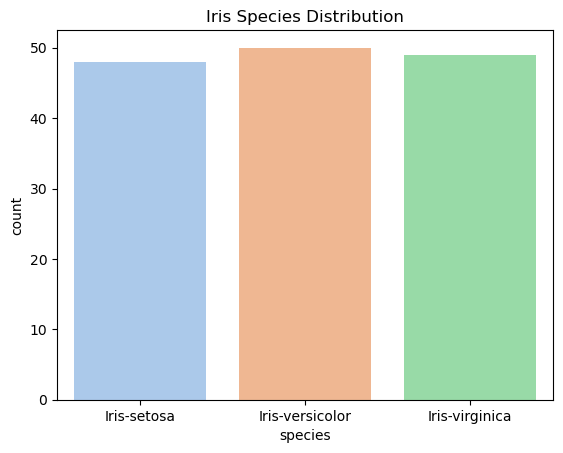

In [6]:
# 📈 Summary statistics
display(df.describe())

# 📊 Visual: Distribution of species
sns.countplot(data=df, x='species', hue='species', palette='pastel', legend=False)
plt.title("Iris Species Distribution")
plt.show()

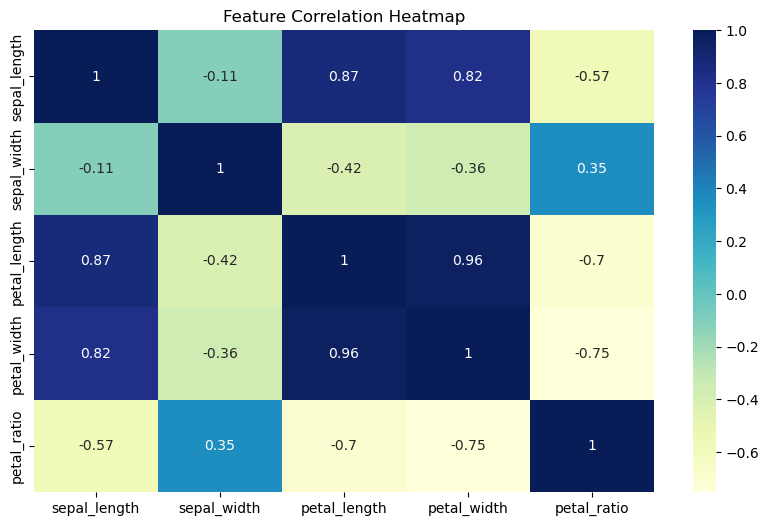

Anomalies detected: 8


In [7]:
# 📊 Visual: Heatmap showing correlation between numeric features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()

# ⚠️ Anomaly Detection using Isolation Forest
if 'petal_length' in df.columns:
    iso = IsolationForest(contamination=0.05, random_state=42)
    df['Anomaly'] = iso.fit_predict(df[['petal_length']])
    print("Anomalies detected:", (df['Anomaly'] == -1).sum())


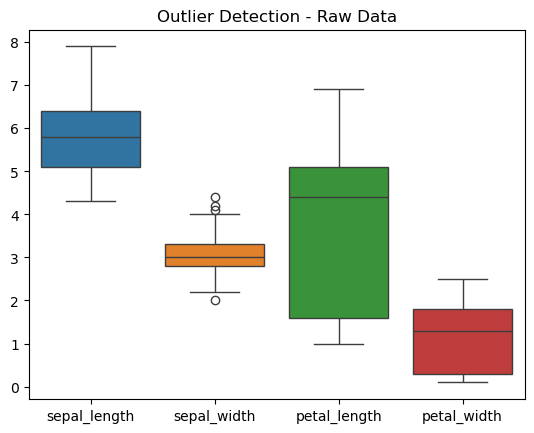

In [8]:
# 📊 Visual: Box plot for detecting outliers in features
sns.boxplot(data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
plt.title("Outlier Detection - Raw Data")
plt.show()

# 🔄 Transforming data using log scale (optional normalization)
df['sepal_length_log'] = np.log1p(df['sepal_length'])
df['petal_length_log'] = np.log1p(df['petal_length'])


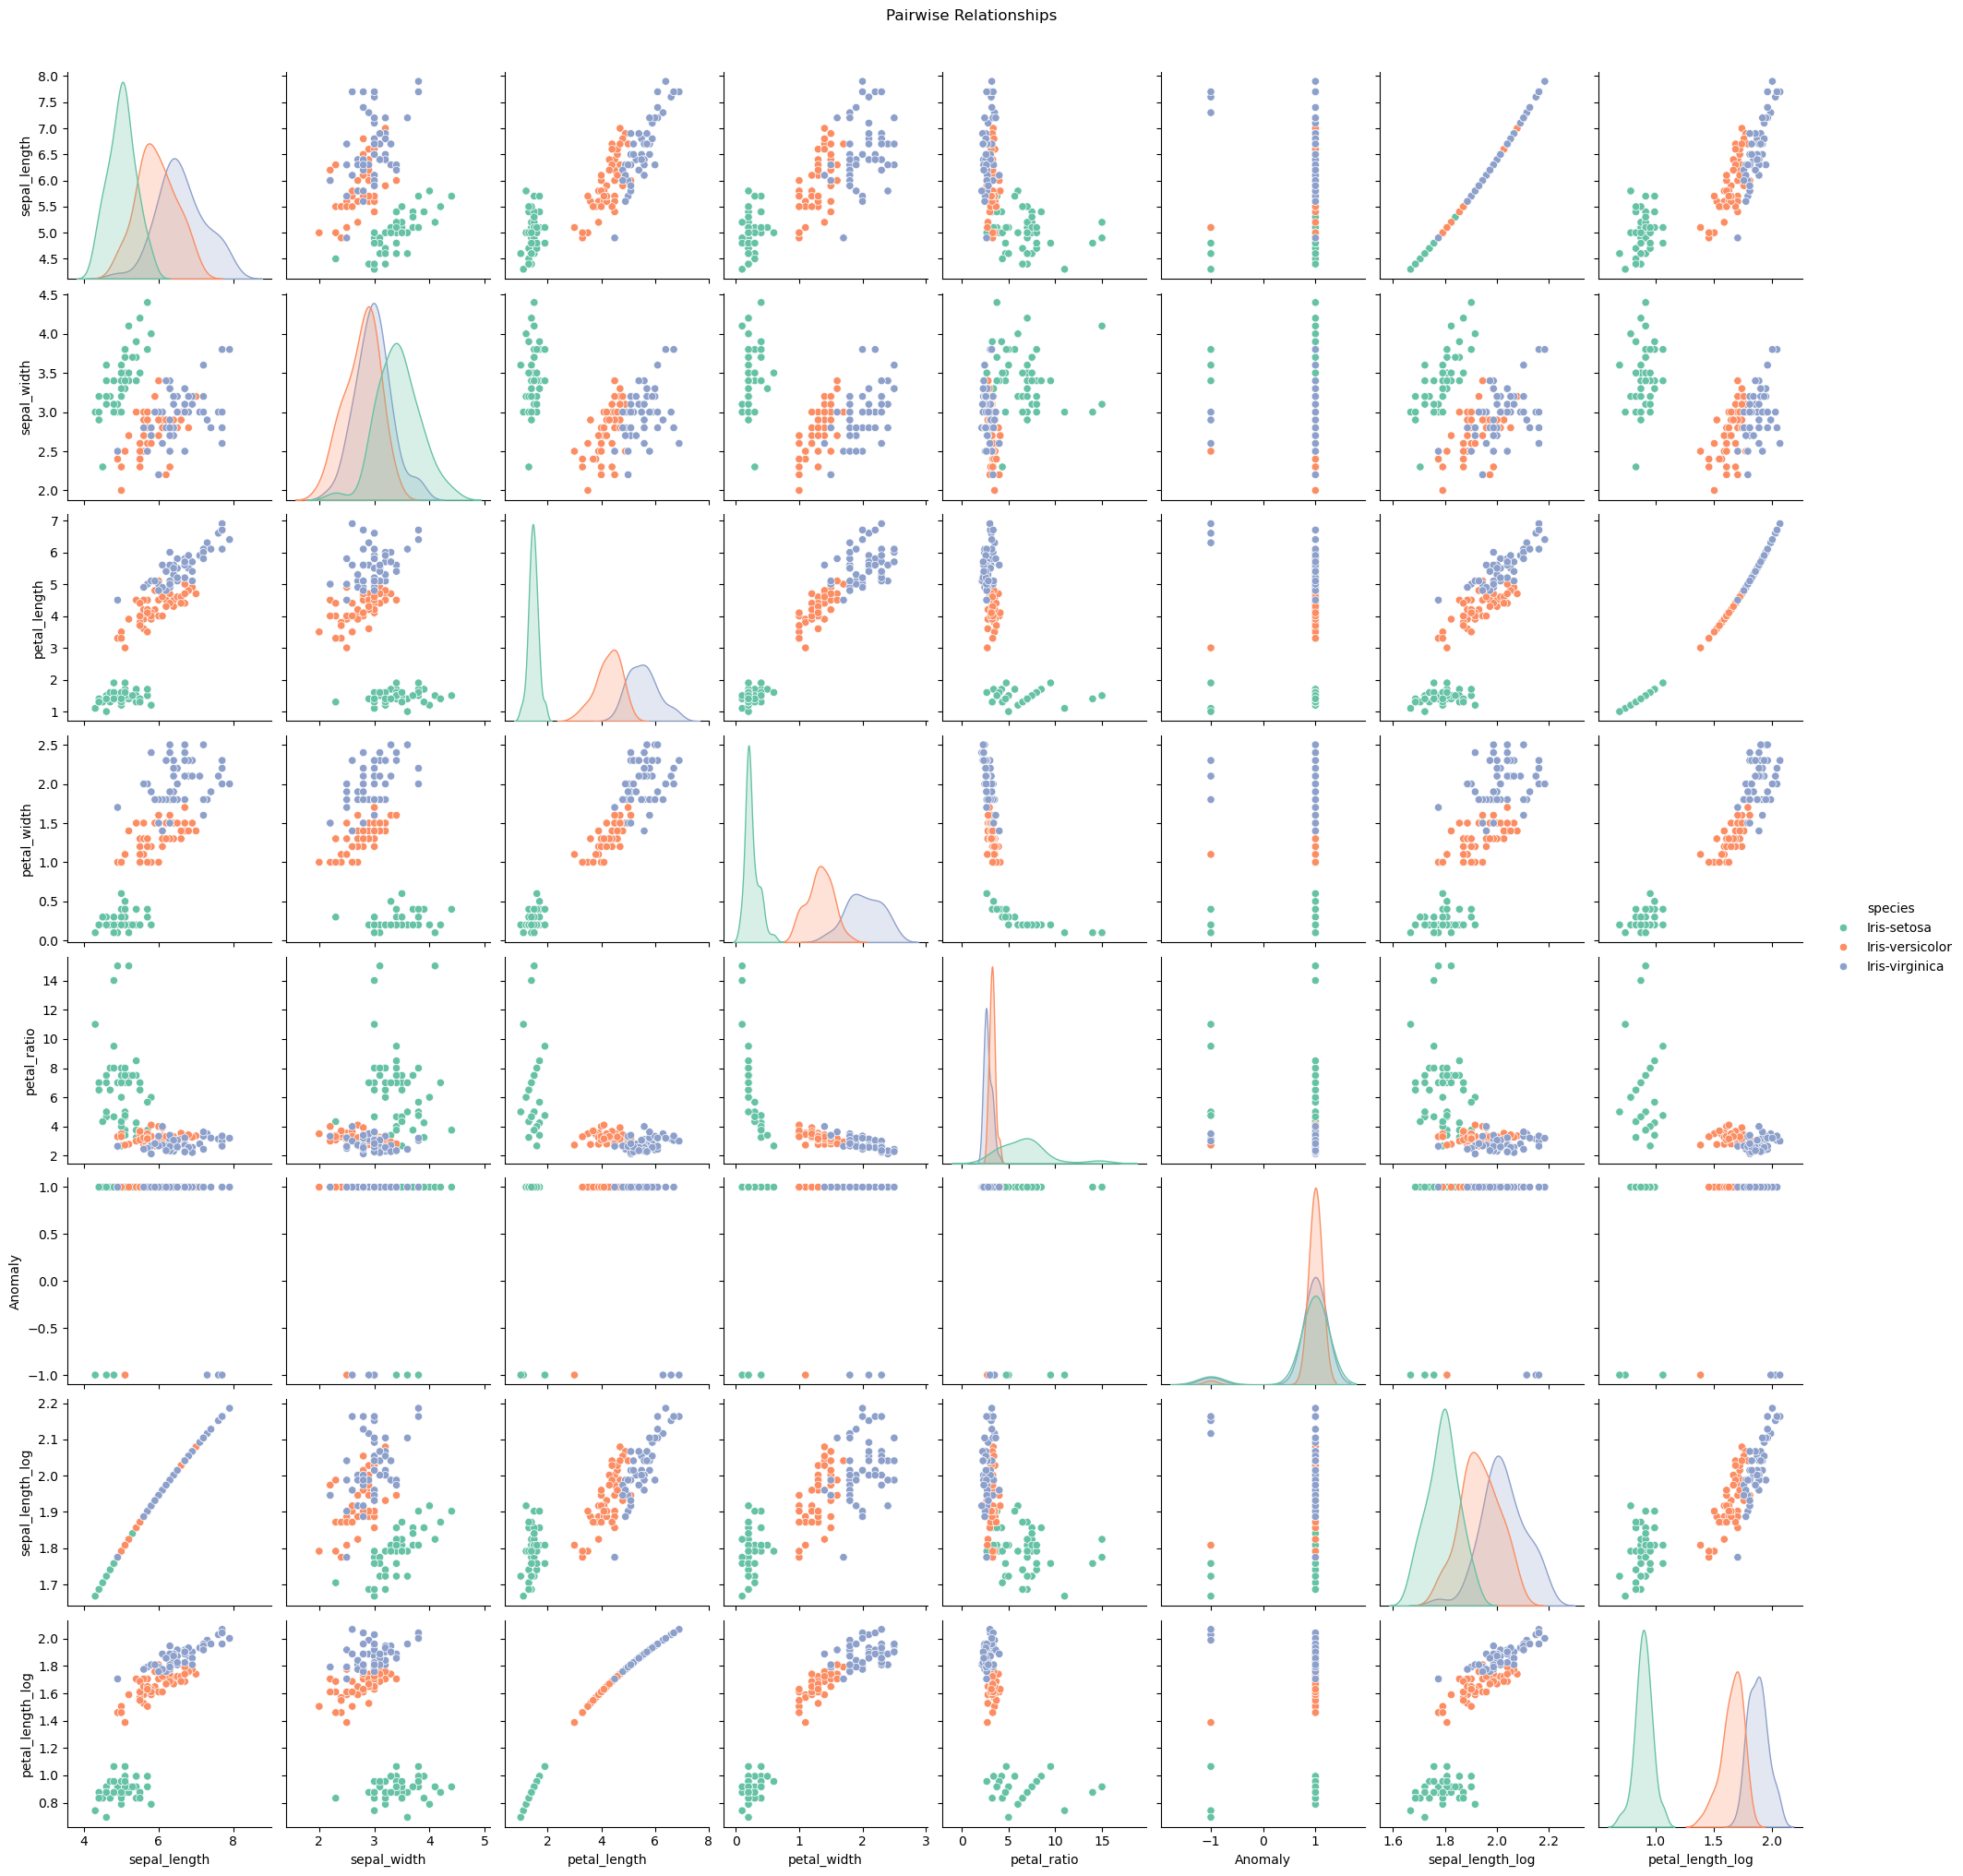

In [9]:
# 📊 Visual: Pairwise plot of all features colored by species
sns.pairplot(df, hue='species', palette='Set2')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

In [10]:
# 🧠 Model Training

# Features and target selection
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Split into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
# 🧪 Prediction and Evaluation
y_pred = model.predict(X_test)

# 📊 Display classification report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

📊 Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.93      0.88      0.90        16

       accuracy                           0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

